In [1]:
# https://mne.tools/stable/auto_tutorials/forward/30_forward.html
# use anaconda 3 mne enviroment

import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
raw_fname = './egi_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path / 'subjects'
subject = 'fsaverage' # change it to use freesurfer's bem

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 2.51TB/s]
Untarring contents of '/home/zhibinz2/mne_data/MNE-sample-data-processed.tar.gz' to '/home/zhibinz2/mne_data'


Attempting to create new mne-python configuration file:
/home/zhibinz2/.mne/mne-python.json
Download complete in 42s (1576.2 MB)


In [2]:
trans = './egi_tran.fif'

In [3]:
info = mne.io.read_info(raw_fname)

    Read a total of 1 projection items:
        Average EEG reference (1 x 256)  idle


In [4]:
info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

In [5]:
# Compute Source Space (surface)
# https://mne.tools/0.19/generated/mne.setup_source_space.html
# The spacing to use. Can be 'ico#' for a recursively subdivided icosahedron, 
# 'oct#' for a recursively subdivided octahedron, 
# 'all' for all points, or an integer to use appoximate distance-based spacing (in mm).
src = mne.setup_source_space(subject, spacing='ico3', add_dist='patch',
                             subjects_dir=subjects_dir)
# oct8 takes 2.5 min produces 65538 source
# ico7 = 'all'


Setting up the source space with the following parameters:

SUBJECTS_DIR = C:\Users\zhouz\mne_data\MNE-sample-data\subjects
Subject      = fsaverage
Surface      = white
Icosahedron subdivision grade 3

>>> 1. Creating the source space...

Doing the icosahedral vertex picking...
Loading C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\surf\lh.white...
Mapping lh fsaverage -> ico (3) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 642/163842 selected to source space (ico = 3)

Loading C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\surf\rh.white...
Mapping rh fsaverage -> ico (3) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.whi

In [5]:
# compute forward solution
# conductivity = (0.3,)  # for single layer
conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(subject='fsaverage', ico=3,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...


FileNotFoundError: File does not exist: /home/zhibinz2/mne_data/MNE-sample-data/subjects/fsaverage/bem/inner_skull.surf

In [7]:
fwd = mne.make_forward_solution(raw_fname, trans=trans, src=src, bem=bem,
                                meg=False, eeg=True, mindist=5.0, n_jobs=2,
                                verbose=True)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=642>, <surface (rh), n_vertices=163842, n_used=642>] MRI (surface RAS) coords, subject 'fsaverage', ~29.0 MB>
MRI -> head transform : egi_tran.fif
Measurement data      : egi_raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 1284 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999060 -0.029951 -0.031346      -0.53 mm
     0.027960  0.997677 -0.062124      21.78 mm
     0.033134  0.061189  0.997576      23.40 mm
     0.000000  0.000000  0.000000       1.00

Read 256 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces are in head coordinates.
Checking that the so

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    Found   0/485 points outside using solid angles
    Total 642/642 points inside the surface
Interior check completed in 7835.3 ms
Checking surface interior status for 642 points...
    Found 147/642 points inside  an interior sphere of radius   48.4 mm
    Found   0/642 points outside an exterior sphere of radius   97.8 mm
    Found   0/495 points outside using surface Qhull
    Found   0/495 points outside using solid angles
    Total 642/642 points inside the surface
Interior check completed in 121.8 ms

Setting up for EEG...


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    7.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


Computing EEG at 1284 source locations (free orientations)...



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished


Finished.
<Forward | MEG channels: 0 | EEG channels: 256 | Source space: Surface with 1284 vertices | Source orientation: Free>


In [8]:
print(f'Before: {src}')
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=642>, <surface (rh), n_vertices=163842, n_used=642>] MRI (surface RAS) coords, subject 'fsaverage', ~29.0 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=642>, <surface (rh), n_vertices=163842, n_used=642>] head coords, subject 'fsaverage', ~29.0 MB>


In [9]:
fwd_fixed = mne.convert_forward_solution(fwd, surf_ori=True, force_fixed=True,
                                         use_cps=True)
leadfield = fwd_fixed['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 256 sensors x 1284 dipoles


In [13]:
import numpy as np
np.shape(leadfield)

(256, 1284)

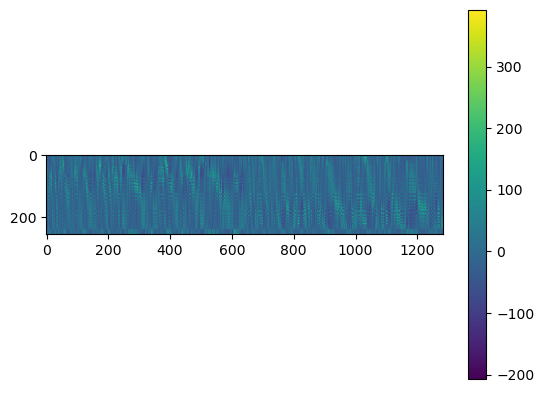

In [14]:
from matplotlib import pyplot as plt
plt.imshow(leadfield)
plt.colorbar()

In [10]:
from hdf5storage import loadmat, savemat 
outdict=dict()
outdict['leadfield']=leadfield
outdict['source_nn']=fwd_fixed['source_nn']
outdict['source_rr']=fwd_fixed['source_rr']
savemat('leadfield_nn_rr',outdict)

In [11]:
mne.write_forward_solution('surface_egi_fsaverage_fixed_fwd.fif', fwd_fixed, overwrite=True, verbose=None)

Overwriting existing file.
    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


C:\Users\zhouz\AppData\Local\Temp\ipykernel_35320\2403303488.py:1: RuntimeWarning: This forward solution is based on a forward solution with free orientation. The original forward solution is stored on disk in X/Y/Z RAS coordinates. Any transformation (surface orientation or fixed orientation) will be reverted. To reapply any transformation to the forward operator please apply convert_forward_solution after reading the forward solution with read_forward_solution.
  mne.write_forward_solution('surface_egi_fsaverage_fixed_fwd.fif', fwd_fixed, overwrite=True, verbose=None)
